<a href="https://colab.research.google.com/github/Moh2106/nlp_atelier1/blob/main/nlp_atelier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SALIFOU** **Mohamed**



OBJECTIF:
Le but de cet atelier est de mettre en pratique et comprendre les différentes étapes afin de
préparer un texte pour la machine. C’est-à-dire appliquer des techniques pour rendre un texte
sous forme des vecteurs numériques exploitables par des modèles de machine learning(représentation vectorielle). Pour cela, on va utiliser les bibliothèques de Python, à savoir
CountVectorizer et TfidfVectorizer.

### Partie 1 : Pré-traitement de texte

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
# corpus
corpus = [
    "Le chat dort sur le tapis.",
    "Les Oiseaux Chantent Le Matin.",
    " Le chien court dans le jardin. ",
    "Mangeons des pommes délicieuses.",
    "Je mange une orange fraîche."
    ]

In [3]:
# convert corpus to dataframe
df = pd.DataFrame(corpus, columns=['text'])
df

,text
0,Le chat dort sur le tapis.
1,Les Oiseaux Chantent Le Matin.
2,Le chien court dans le jardin.
3,Mangeons des pommes délicieuses.
4,Je mange une orange fraîche.


In [4]:
# string punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def deletePunctuation(texte):
  result = [word for word in texte if word not in string.punctuation]
  return "".join(result)

In [6]:
deletePunctuation("Bonjour math..")

'Bonjour math'

In [7]:
df['t_s_p'] = df['text'].apply(deletePunctuation)
df

,text,t_s_p
0,Le chat dort sur le tapis.,Le chat dort sur le tapis
1,Les Oiseaux Chantent Le Matin.,Les Oiseaux Chantent Le Matin
2,Le chien court dans le jardin.,Le chien court dans le jardin
3,Mangeons des pommes délicieuses.,Mangeons des pommes délicieuses
4,Je mange une orange fraîche.,Je mange une orange fraîche


In [8]:
# Ecrire une fonction pour tokinezer le corpus de colonne « t_s_p ».
def tokenizeTexte(texte):
  texte = texte.lower()
  return word_tokenize(texte, language="french")

In [56]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [63]:
french = set(stopwords.words('french'))
print(french)

{'ayant', 'n', 'aie', 'du', 'eussions', 'toi', 'pour', 'eue', 'vos', 'ta', 'fussiez', 'aurions', 'elle', 'aies', 'fusses', 'avec', 'sois', 'eûmes', 'à', 'sont', 'eues', 'serait', 'ait', 'avait', 'ayants', 'le', 'y', 'un', 'était', 'j', 'étées', 'ma', 'serons', 'avez', 'fussions', 'la', 'sur', 'sa', 'nos', 'par', 'qu', 's', 'as', 'auraient', 'd', 'te', 'aient', 'suis', 'aux', 'fusse', 'étés', 'dans', 'auriez', 'tu', 'serais', 'eût', 'seriez', 'ayons', 'des', 'sera', 'en', 'étante', 'eusse', 'étions', 'ont', 'étant', 'ayantes', 'moi', 'lui', 'aviez', 'avaient', 'étaient', 'de', 'tes', 'serions', 'seront', 'seraient', 'soyons', 'ne', 'es', 'soyez', 'eus', 'eu', 'je', 'serai', 'il', 'ai', 'ces', 'nous', 'ses', 'et', 'aurait', 'ce', 'se', 'est', 'aura', 'avais', 'fûtes', 'ton', 'aurais', 'me', 'serez', 'eûtes', 'eurent', 'au', 'mon', 'fut', 'eussiez', 'son', 'votre', 'fût', 'une', 't', 'été', 'auras', 'eut', 'pas', 'auront', 'ou', 'soient', 'eusses', 'les', 'l', 'fussent', 'fûmes', 'c', 'fu

In [49]:
def deleteStopWord(texte):
  result = [word for word in texte if word not in french]
  return result

In [50]:
result = deleteStopWord(['nous', 'chat', 'leur'])
result

['chat']

In [14]:
df['t_token'] = df['t_s_p'].apply(tokenizeTexte)
df

,text,t_s_p,t_token
0,Le chat dort sur le tapis.,Le chat dort sur le tapis,"[le, chat, dort, sur, le, tapis]"
1,Les Oiseaux Chantent Le Matin.,Les Oiseaux Chantent Le Matin,"[les, oiseaux, chantent, le, matin]"
2,Le chien court dans le jardin.,Le chien court dans le jardin,"[le, chien, court, dans, le, jardin]"
3,Mangeons des pommes délicieuses.,Mangeons des pommes délicieuses,"[mangeons, des, pommes, délicieuses]"
4,Je mange une orange fraîche.,Je mange une orange fraîche,"[je, mange, une, orange, fraîche]"


In [15]:
df['t_without_stopword'] = df['t_token'].apply(deleteStopWord)
df

,text,t_s_p,t_token,t_without_stopword
0,Le chat dort sur le tapis.,Le chat dort sur le tapis,"[le, chat, dort, sur, le, tapis]","[chat, dort, tapis]"
1,Les Oiseaux Chantent Le Matin.,Les Oiseaux Chantent Le Matin,"[les, oiseaux, chantent, le, matin]","[oiseaux, chantent, matin]"
2,Le chien court dans le jardin.,Le chien court dans le jardin,"[le, chien, court, dans, le, jardin]","[chien, court, jardin]"
3,Mangeons des pommes délicieuses.,Mangeons des pommes délicieuses,"[mangeons, des, pommes, délicieuses]","[mangeons, pommes, délicieuses]"
4,Je mange une orange fraîche.,Je mange une orange fraîche,"[je, mange, une, orange, fraîche]","[mange, orange, fraîche]"


In [16]:
stemming = PorterStemmer()
def applyStemming(texte):
  result = [stemming.stem(word) for word in texte]
  return result

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
lemmatizer = WordNetLemmatizer()
def applyLemmetizer(texte):
  result = [lemmatizer.lemmatize(word) for word in texte]
  return result

In [19]:
df['t_stemming'] = df['t_without_stopword'].apply(applyStemming)
df['t_lemmatize'] = df['t_without_stopword'].apply(applyLemmetizer)
df

,text,t_s_p,t_token,t_without_stopword,t_stemming,t_lemmatize
0,Le chat dort sur le tapis.,Le chat dort sur le tapis,"[le, chat, dort, sur, le, tapis]","[chat, dort, tapis]","[chat, dort, tapi]","[chat, dort, tapis]"
1,Les Oiseaux Chantent Le Matin.,Les Oiseaux Chantent Le Matin,"[les, oiseaux, chantent, le, matin]","[oiseaux, chantent, matin]","[oiseaux, chantent, matin]","[oiseaux, chantent, matin]"
2,Le chien court dans le jardin.,Le chien court dans le jardin,"[le, chien, court, dans, le, jardin]","[chien, court, jardin]","[chien, court, jardin]","[chien, court, jardin]"
3,Mangeons des pommes délicieuses.,Mangeons des pommes délicieuses,"[mangeons, des, pommes, délicieuses]","[mangeons, pommes, délicieuses]","[mangeon, pomm, délicieus]","[mangeons, pommes, délicieuses]"
4,Je mange une orange fraîche.,Je mange une orange fraîche,"[je, mange, une, orange, fraîche]","[mange, orange, fraîche]","[mang, orang, fraîch]","[mange, orange, fraîche]"


### Partie 2 : CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(corpus)

CountVectorizer()

In [23]:
vectorizer = count_vectorizer.transform(corpus)
word_matrix = vectorizer.toarray()
word_matrix

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]])

### Partie 3 : TfidfVectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tdidfvectorizer = TfidfVectorizer()

In [26]:
tdidfvectorizer.fit(corpus)

TfidfVectorizer()

In [27]:
tdidf_matrix = tdidfvectorizer.transform(corpus)
tdidf_matrix = tdidf_matrix.toarray()
tdidf_matrix

array([[0.        , 0.41544037, 0.        , 0.        , 0.        ,
        0.        , 0.41544037, 0.        , 0.        , 0.        ,
        0.        , 0.55645052, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.41544037,
        0.41544037, 0.        ],
       [0.47412465, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3175268 , 0.47412465, 0.        , 0.        ,
        0.47412465, 0.47412465, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.41544037, 0.41544037, 0.41544037,
        0.        , 0.        , 0.        , 0.        , 0.41544037,
        0.        , 0.55645052, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5      

### Réduction par PCA

In [28]:
from sklearn.decomposition import PCA

In [81]:
def build_vocabulary(corpus):
  vocabulary = []
  for lines in corpus:
    lines = deletePunctuation(lines)
    lines = lines.split(" ")

    for word in lines:
      if word.lower() not in french and word != "":
        vocabulary.append(word.lower())
  return vocabulary


In [82]:
vocabulary = set(build_vocabulary(corpus))
vocabulary

{'chantent',
 'chat',
 'chien',
 'court',
 'dort',
 'délicieuses',
 'fraîche',
 'jardin',
 'mange',
 'mangeons',
 'matin',
 'oiseaux',
 'orange',
 'pommes',
 'tapis'}

In [84]:
from collections import defaultdict
word2index = {}

def buid_word2index(vocabulary):
  for index,word in enumerate(vocabulary):
    word2index[word] = index

In [85]:
buid_word2index(vocabulary)
word2index

{'matin': 0,
 'chantent': 1,
 'dort': 2,
 'jardin': 3,
 'chien': 4,
 'mange': 5,
 'orange': 6,
 'tapis': 7,
 'fraîche': 8,
 'chat': 9,
 'mangeons': 10,
 'délicieuses': 11,
 'court': 12,
 'oiseaux': 13,
 'pommes': 14}

In [103]:
word2encoding = {}
vocab_size = len(vocabulary)
def build_one_hot_encoding():
  for word, index in word2index.items():
      oneHotArray = np.zeros(vocab_size)
      oneHotArray[index] = 1
      word2encoding[word] = oneHotArray

In [104]:
build_one_hot_encoding()
word2encoding

{'matin': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'chantent': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'dort': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'jardin': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'chien': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mange': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'orange': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'tapis': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'fraîche': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'chat': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'mangeons': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'délicieuses': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'court': array([0., 0., 0., 0., 0., 0

In [111]:
# Convertir le dictionnaire en DataFrame
dataset_pca  = pd.DataFrame.from_dict(word2encoding, orient='index')

In [112]:
dataset_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
matin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chantent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dort,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jardin,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chien,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mange,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orange,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tapis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fraîche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
chat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# Appliquer le PCA avec le nombre de composantes souhaité (par exemple, 2)
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(dataset_pca)

In [120]:
# Créer un DataFrame pour les composantes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [122]:
print(df_pca)

             PC1           PC2
0  -1.705313e-18 -5.201204e-17
1  -1.847895e-02  5.335383e-02
2   5.189420e-02 -3.134871e-01
3  -3.403177e-01  7.587977e-02
4  -2.150978e-02  4.346299e-01
5   5.552783e-02  1.472502e-01
6   3.700650e-02  5.666678e-01
7  -1.251110e-01  5.396117e-02
8  -4.185250e-01 -2.406773e-01
9  -1.484721e-01 -3.565400e-01
10  2.640827e-01 -3.937015e-01
11  7.470944e-01 -5.418389e-02
12 -8.513132e-02 -1.420777e-03
13 -1.178469e-01 -7.283396e-02
14  1.197871e-01  1.011019e-01


In [127]:
# ajouter les tokens aux valeurs de PCA
df_pca['token'] = dataset_pca.index

In [126]:
print(df_pca)

             PC1           PC2        token
0  -1.705313e-18 -5.201204e-17        matin
1  -1.847895e-02  5.335383e-02     chantent
2   5.189420e-02 -3.134871e-01         dort
3  -3.403177e-01  7.587977e-02       jardin
4  -2.150978e-02  4.346299e-01        chien
5   5.552783e-02  1.472502e-01        mange
6   3.700650e-02  5.666678e-01       orange
7  -1.251110e-01  5.396117e-02        tapis
8  -4.185250e-01 -2.406773e-01      fraîche
9  -1.484721e-01 -3.565400e-01         chat
10  2.640827e-01 -3.937015e-01     mangeons
11  7.470944e-01 -5.418389e-02  délicieuses
12 -8.513132e-02 -1.420777e-03        court
13 -1.178469e-01 -7.283396e-02      oiseaux
14  1.197871e-01  1.011019e-01       pommes


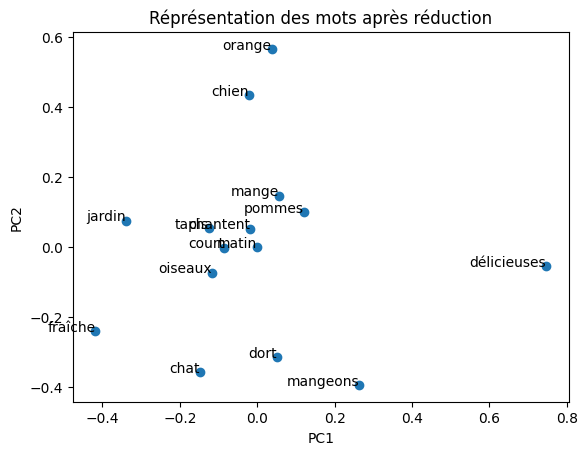

In [135]:
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")

# Ajouter du texte à chaque point
for i, txt in enumerate(df_pca['token']):
    plt.text(df_pca['PC1'][i], df_pca['PC2'][i], txt, fontsize=10, ha='right')

plt.title("Réprésentation des mots après réduction")
plt.show()

### Partie 4 : Application sur dataset YourubeSpam collection

In [ ]:
psy_dataset = pd.read_csv('/content/Youtube01-Psy.csv')
psy_dataset

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1
